# Dementia Prediction Project  
Sarah Spalding  
Goal: The goal of this project is to analyze an existing dataset comparing individuals with and without dementia and to predict the likelihood of dementia in other individuals based off of this dataset

In [42]:
# import libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis with SQL
Goal: get a general feel for the data and trends

In [30]:
# connect to database and create a new dataframe to manipulate
conn = sqlite3.connect("Dementia.db")
sql_string = 'SELECT * FROM Data_Wrangled'
data_explore = pd.read_sql(sql_string, conn)

In [31]:
data_explore.head()

,level_0,index,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented
0,0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883,0,0,1
1,1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876,0,0,1
2,2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046,0,1,0
3,3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010,0,1,0
4,4,4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,1,80,12,2.0,22.0,0.5,1698,0.701,1.034,0,1,0


In [32]:
# display the average age of the patients
pd.read_sql('select avg("Age") as Average_Age from Data_Wrangled', conn)

,Average_Age
0,77.013405


In [33]:
# determine the number of patients with dementia, without dementia, and converted
pd.read_sql('select "Group", count(distinct("Subject ID")) as "Number_Patients" from Raw_Data group by "Group";', conn)

,Group,Number_Patients
0,Converted,14
1,Demented,64
2,Nondemented,72


In [34]:
# determine the number of patients in the study
pd.read_sql('select count(distinct("Subject ID")) as "Number_Patients" from Data_Wrangled;', conn)

,Number_Patients
0,150


In [35]:
# Determine the average, maximum, and minumum MMSE of the study
pd.read_sql('select avg(MMSE) as "Average_MMSE", max(MMSE) as "Max_MMSE", min(MMSE) as "Min_MMSE" from Data_Wrangled;', conn)

,Average_MMSE,Max_MMSE,Min_MMSE
0,27.340483,30.0,4.0


In [36]:
# Determine the average, maximum, and minumum CDR of the study
pd.read_sql('select avg(CDR) as "Average_CDR", max(CDR) as "Max_CDR", min(CDR) as "Min_CDR" from Data_Wrangled;', conn)

,Average_CDR,Max_CDR,Min_CDR
0,0.290885,2.0,0.0


In [37]:
# determine the number of male and female patients in the study
pd.read_sql('select "M/F", count(distinct("Subject ID")) as "Number_Patients" from Raw_Data group by "M/F";', conn)

,M/F,Number_Patients
0,F,88
1,M,62


In [39]:
# maximum number of patient visits
pd.read_sql('select max("Visit") as "Max_Visits" from Data_Wrangled;', conn)

,Max_Visits
0,5


In [40]:
# group data by visit number
pd.read_sql('select * from Data_Wrangled where "Visit" = 1;', conn)

,level_0,index,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented
0,0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883,0,0,1
1,2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046,0,1,0
2,5,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444,0,0,1
3,7,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039,0,0,1
4,10,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,1,71,16,2.0,28.0,0.5,1357,0.748,1.293,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,359,359,OAS2_0182,OAS2_0182_MR1,Demented,1,0,1,73,12,2.0,23.0,0.5,1661,0.698,1.056,0,1,0
146,361,361,OAS2_0183,OAS2_0183_MR1,Nondemented,1,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174,0,0,1
147,365,365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296,0,1,0
148,367,367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030,0,1,0


### Exploratory Data Analysis with Visualization

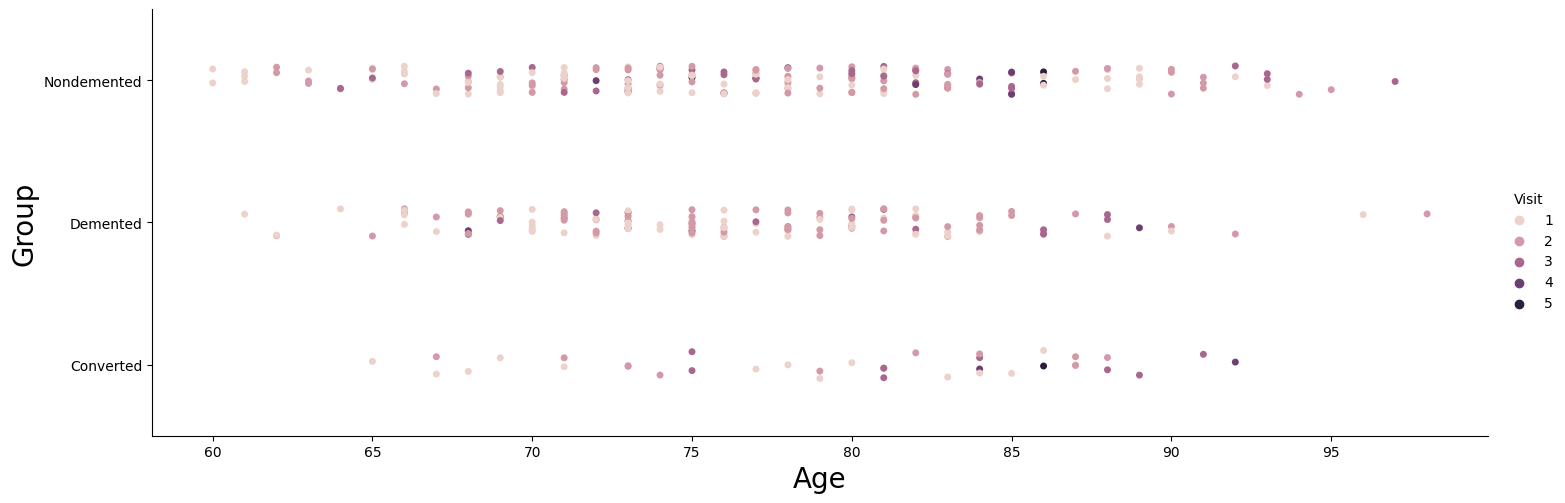

In [46]:
# Age vs Group with the legend showing visit number
Age_v_group = pd.read_sql('select "Group", "Age", "Visit" from Data_Wrangled;', conn)
sns.catplot(y='Group', x='Age', hue='Visit', data=Age_v_group, aspect=3)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Group', fontsize = 20)
plt.show()


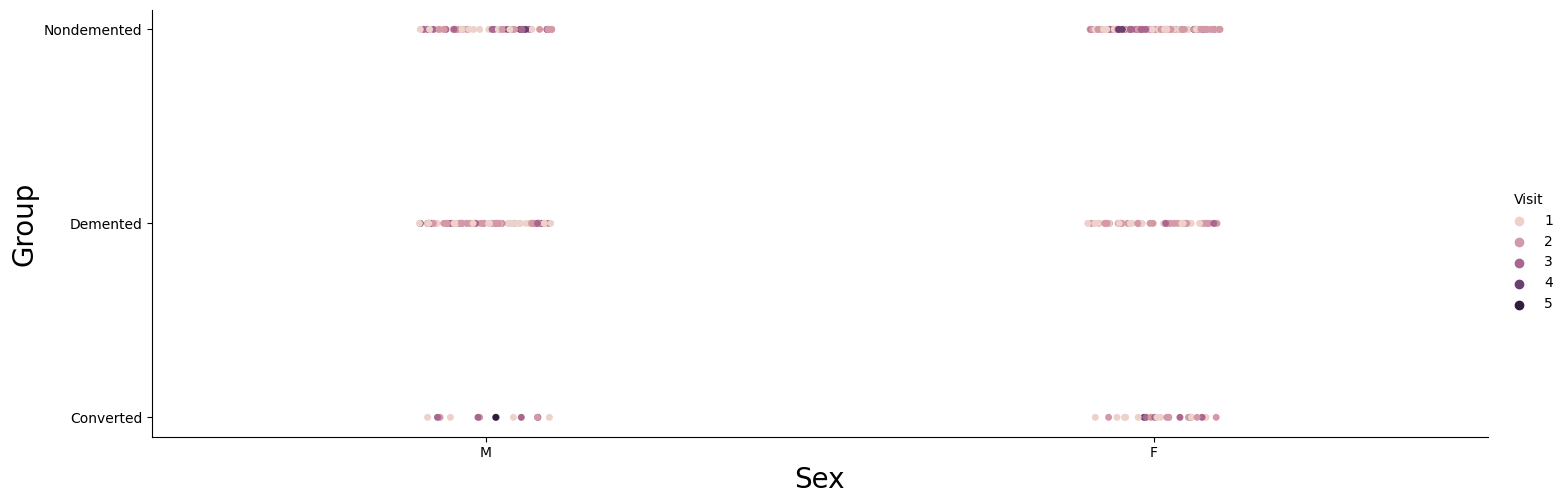

In [89]:
# Sex vs Group with the legend showing visit number
Age_v_group = pd.read_sql('select "Group", "M/F", "Visit" from Raw_Data;', conn)
sns.catplot(y='Group', x='M/F', hue='Visit', data=Age_v_group, aspect=3)
plt.xlabel('Sex', fontsize = 20)
plt.ylabel('Group', fontsize = 20)
plt.show()

In [72]:
# determine the number of male patients in the study with Dementia
MaleData = pd.read_sql('select count(distinct("Subject ID")) as "Number_Patients_Male", "Group" from Raw_Data where "M/F" = "M" group by "Group";', conn)
MaleData

,Number_Patients_Male,Group
0,4,Converted
1,36,Demented
2,22,Nondemented


In [54]:
# determine the number of Female patients in the study with Dementia
FemaleData = pd.read_sql('select count(distinct("Subject ID")) as "Number_Patients_Female", "Group" from Raw_Data where "M/F" = "F" group by "Group";', conn)

In [114]:
# function to get percentages
# Numbers is subest of one of the columns that you are interested in having a percent of
# Total is the total of that subset
def MakePercentages(Numbers,Total):
    Percentages = [(elem/Total)*100 for elem in Numbers]
    return pd.DataFrame({'Percentages':Percentages,'Group':['Converted','Demented','Nondemented']})

In [113]:
# calculate percentage of males and females with and without dementia and compare
NumberMales = pd.read_sql('select count(distinct("Subject ID")) as "Number_Patients" from Raw_Data where "M/F" = "M";', conn).at[0,'Number_Patients']
MaleData_Percentages_df = MakePercentages(MaleData['Number_Patients_Male'],NumberMales)
MaleData_Percentages_df

,Percentages,Group
0,6.451613,Converted
1,58.064516,Demented
2,35.483871,Nondemented


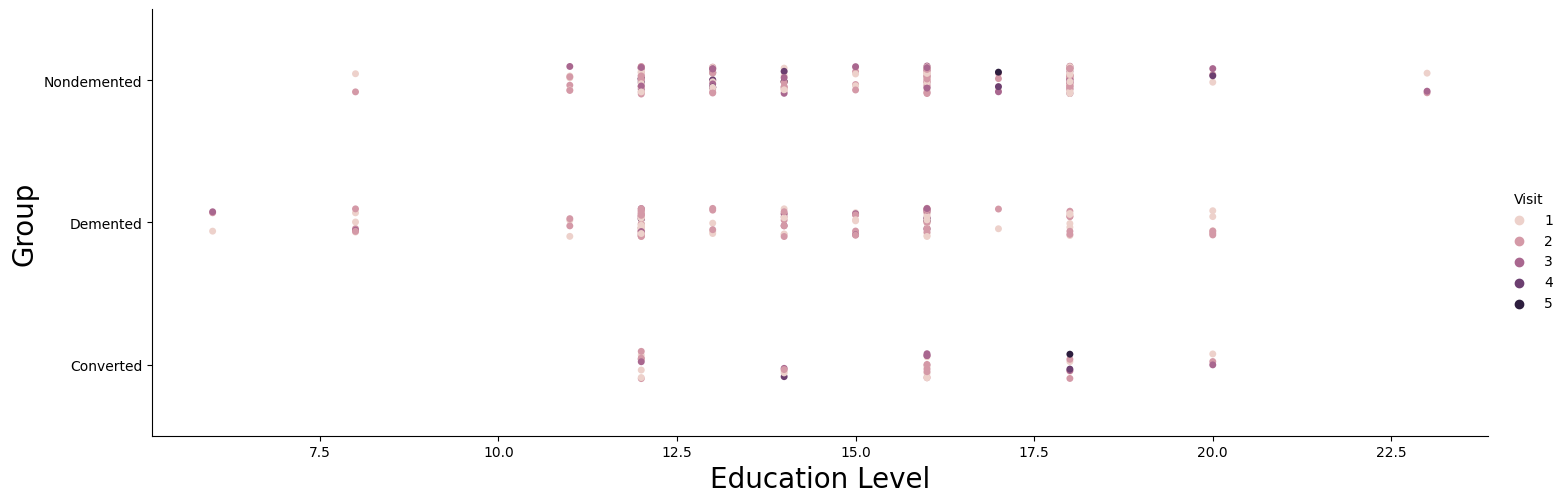

In [77]:
# Education vs Group with the legend showing visit number
EDUC_v_group = pd.read_sql('select "Group", "EDUC", "Visit" from Data_Wrangled;', conn)
sns.catplot(y='Group', x='EDUC', hue='Visit', data=EDUC_v_group, aspect=3)
plt.xlabel('Education Level', fontsize = 20)
plt.ylabel('Group', fontsize = 20)
plt.show()


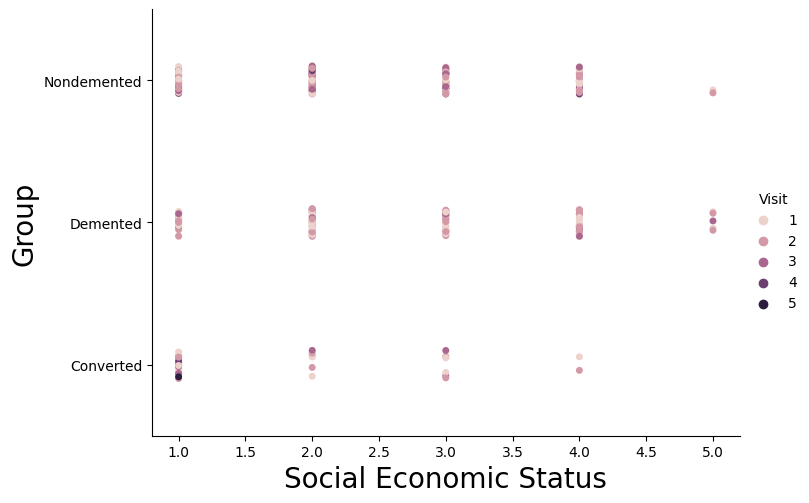

In [84]:
# SES vs Group with the legend showing visit number
SES_v_group = pd.read_sql('select "Group", "SES", "Visit" from Data_Wrangled;', conn)
sns.catplot(y='Group', x='SES', hue='Visit', data=SES_v_group, aspect=1.5)
plt.xlabel('Social Economic Status', fontsize = 20)
plt.ylabel('Group', fontsize = 20)
plt.show()